# Assignment 2

This assignment is meant to help you familiarize yourself with Pandas, conduct data wrangling, EDA, and visualization.

To receive credit, answer all questions correctly and submit to Canvas before the deadline.

**This assignment is due Thursday, April 15 at 11:59 PM.**

**YOUR FULL NAME (1 POINT)**: *Jing Tian*




## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the assignment, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

## Part 1: Pandas

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this assignment, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating DataFrames
* Slicing DataFrames (i.e. selecting rows and columns)
* Filtering data

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the quarter, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [794]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

### 1.1 Creating DataFrames & Basic Manipulations

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a table in which each column has a specific data type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for the pandas `DataFrame` class  provides at least two syntaxes to create a DataFrame.

**Note**: 0 point for instructions, however -5 if you do not run, output, and understand.

**Syntax 1:** You can create a DataFrame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [795]:
teams = pd.DataFrame(
    data={'team': ['flash', 'arrow', 'flash', 'legends', 
                   'flash', 'legends', 'arrow'],
          'hero': ['flash', 'arrow', 'vibe', 'atom', 
                   'killer frost', 'firestorm', 'speedy']})

teams

,team,hero
0,flash,flash
1,arrow,arrow
2,flash,vibe
3,legends,atom
4,flash,killer frost
5,legends,firestorm
6,arrow,speedy


You can also specify the index of the rows as follows.

In [796]:
heroes = pd.DataFrame(
    data={'color': ['red', 'green', 'black', 
                    'blue', 'black', 'red'],
          'first_seen_on': ['a', 'a', 'f', 'a', 'a', 'f'],
          'first_season': [2, 1, 2, 3, 3, 1]},
    index=['flash', 'arrow', 'vibe', 
           'atom', 'canary', 'firestorm']
)

heroes

,color,first_seen_on,first_season
flash,red,a,2
arrow,green,a,1
vibe,black,f,2
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


**Syntax 2:** You can also define a DataFrame by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [797]:
identities = pd.DataFrame(
    [('barry allen', 'flash'), ('oliver queen', 'arrow'), 
     ('cisco ramon', 'vibe'), ('ray palmer', 'atom'), ('sara lance', 'canary'),
     ('martin stein', 'firestorm'), ('ronnie raymond', 'firestorm')],
     columns = ['ego', 'alter-ego'])

identities

,ego,alter-ego
0,barry allen,flash
1,oliver queen,arrow
2,cisco ramon,vibe
3,ray palmer,atom
4,sara lance,canary
5,martin stein,firestorm
6,ronnie raymond,firestorm


You can obtain the dimensions of a DataFrame by using the shape attribute `DataFrame.shape`.

In [798]:
heroes.shape

(6, 3)

You can also convert the entire DataFrame into a two-dimensional numpy array.

In [799]:
heroes.values

array([['red', 'a', 2],
       ['green', 'a', 1],
       ['black', 'f', 2],
       ['blue', 'a', 3],
       ['black', 'a', 3],
       ['red', 'f', 1]], dtype=object)

#### Question 1.1.a (3 points)

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank` to the `heroes` table which expresses your personal preference about the hero (1 is the most favorite). 

In [800]:
# type your code here
heroes['rank'] = [1, 4, 2, 3, 4, 1]
heroes

,color,first_seen_on,first_season,rank
flash,red,a,2,1
arrow,green,a,1,4
vibe,black,f,2,2
atom,blue,a,3,3
canary,black,a,3,4
firestorm,red,f,1,1


#### Question 1.1.b (3 points)

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. The first parameter is for the rows and second is for columns. The `:` means changing all rows and the `'new column name'` indicates the name of the column you are modifying (or in this case, adding). 

Add a column called `rank_dup` to the `heroes` table which contains the same values in the same order as the `rank` column.

In [801]:
# type your code here
# it also could be: heroes.loc[:, 'rank_dup'] = [1, 4, 2, 3, 4, 1]
heroes.loc[:, 'rank_dup'] = heroes['rank']
heroes

,color,first_seen_on,first_season,rank,rank_dup
flash,red,a,2,1,1
arrow,green,a,1,4,4
vibe,black,f,2,2,2
atom,blue,a,3,3,3
canary,black,a,3,4,4
firestorm,red,f,1,1,1


#### Question 1.1.c (3 points)

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) both the `rank` and `rank_dup` columns you created. Make sure to use the `axis` parameter correctly. Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas DataFrame at once using a list of column names.

In [802]:
# type your code here
heroes_original = heroes.drop(['rank', 'rank_dup'], axis = 1)
heroes_original

,color,first_seen_on,first_season
flash,red,a,2
arrow,green,a,1
vibe,black,f,2
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


If you check the table of `heroes` again, nothing has been dropped.



In [803]:
heroes

,color,first_seen_on,first_season,rank,rank_dup
flash,red,a,2,1,1
arrow,green,a,1,4,4
vibe,black,f,2,2,2
atom,blue,a,3,3,3
canary,black,a,3,4,4
firestorm,red,f,1,1,1


#### Question 1.1.d (3 points)

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) the columns of `heroes_original` so they begin with capital letters. Set this new DataFrame to `heroes_cap`.

In [804]:
# type your code here
heroes_cap = heroes_original.rename(columns={"color": "Color", "first_seen_on": "First_Seen_On", "first_season": "First_Season"})
heroes_cap

,Color,First_Seen_On,First_Season
flash,red,a,2
arrow,green,a,1
vibe,black,f,2
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


The `heroes_original` table is not changed.

In [805]:
heroes_original

,color,first_seen_on,first_season
flash,red,a,2
arrow,green,a,1
vibe,black,f,2
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


### 1.2: Slicing DataFrames - selecting rows and columns

**Note**: 0 points for instructions, -5 if you do not run, output, and understand


#### Selection Using Label/Index, with `loc`

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. Remember that the colon `:` means "everything". For example, if we want the `color` column of the `ex` DataFrame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (i.e., primary key) of the DataFrame.

In [806]:
heroes_original.loc[:, 'color']

flash          red
arrow        green
vibe         black
atom          blue
canary       black
firestorm      red
Name: color, dtype: object

Notice the difference between the following cell and the previous one, just passing in `'color'` returns a Series while `['color']` returns a DataFrame.

In [807]:
heroes_original.loc[:, ['color']]

,color
flash,red
arrow,green
vibe,black
atom,blue
canary,black
firestorm,red


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the DataFrame to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 

In [808]:
teams.loc[2:5, :]

,team,hero
2,flash,vibe
3,legends,atom
4,flash,killer frost
5,legends,firestorm


#### Selection using Integer location, with `iloc`

Alternatively, another pandas feature `iloc[]`, lets you slice the DataFrame by row position and column position instead of by row index and column label, as `loc[]` does. It is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, just like normal Python slicing.

As a mnemonic, remember that the "i" in `iloc` means "integer." 

Below, we have sorted the `teams` DataFrame. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 0. This distinction is important in understanding the difference between `loc[]` and `iloc[]`.

In [809]:
sorted_teams = teams.sort_values(by = ['team'])
sorted_teams

,team,hero
1,arrow,arrow
6,arrow,speedy
0,flash,flash
2,flash,vibe
4,flash,killer frost
3,legends,atom
5,legends,firestorm


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `hero` column of the `teams` DataFrame using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting by team.

In [810]:
sorted_teams.iloc[1:4, 1]

6    speedy
0     flash
2      vibe
Name: hero, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [811]:
sorted_teams.loc[1:4, 'hero']

1           arrow
6          speedy
0           flash
2            vibe
4    killer frost
Name: hero, dtype: object

#### Question 1.2.a (3 points)

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select 4 columns (from `color` to `rank` **in that order**) from the `heroes` table.

In [812]:
# type your code here
heroes_select = heroes.iloc[:, 0:4]
heroes_select

,color,first_seen_on,first_season,rank
flash,red,a,2,1
arrow,green,a,1,4
vibe,black,f,2,2
atom,blue,a,3,3
canary,black,a,3,4
firestorm,red,f,1,1


### 1.3 Filtering Data - filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it is for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only characters that debuted in season 3 of Archer.

> Indented block



In [813]:
season3 = heroes_original[(heroes_original['first_season']==3) & (heroes_original['first_seen_on']=='a')]
season3

,color,first_seen_on,first_season
atom,blue,a,3
canary,black,a,3


#### Question 1.3.a (3 points)

An often-used operation is a test-of-membership. The `Series.isin(values)` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html?highlight=isin#pandas.Series.isin) returns a boolean array denoting whether each element of the Series is in `values`. We can use the array to subset. Return rows of heroes from the `heroes_original` table from seasons in `{1, 3}`.


In [814]:
# type your code here
result = heroes_original[heroes_original['first_season'].isin([1, 3])]
result

,color,first_seen_on,first_season
arrow,green,a,1
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


### 1.4 Joining Tables

For simplicity of the example, we will convert the index of the `heroes_original` into an explicit column called `hero`


In [815]:
heroes_original['hero'] = heroes_original.index
heroes_original

,color,first_seen_on,first_season,hero
flash,red,a,2,flash
arrow,green,a,1,arrow
vibe,black,f,2,vibe
atom,blue,a,3,atom
canary,black,a,3,canary
firestorm,red,f,1,firestorm


#### Inner Join

The inner join below returns rows representing the heroes that appear in both DataFrames.

In [816]:
hero_team = pd.merge(heroes_original, teams, how='inner', on='hero')
hero_team

,color,first_seen_on,first_season,hero,team
0,red,a,2,flash,flash
1,green,a,1,arrow,arrow
2,black,f,2,vibe,flash
3,blue,a,3,atom,legends
4,red,f,1,firestorm,legends


#### Left & Right Join

The left join returns rows representing heroes in the table `heroes_original` (left), augmented by information found in the `teams` table. Its counterpart, the right join, would return heroes in the table of `teams`. 

**Note**: the team for hero `canary` is a `NaN` value, representing missing data.

In [817]:
left_hero_team = pd.merge(heroes_original, teams, how='left', on='hero')
left_hero_team

,color,first_seen_on,first_season,hero,team
0,red,a,2,flash,flash
1,green,a,1,arrow,arrow
2,black,f,2,vibe,flash
3,blue,a,3,atom,legends
4,black,a,3,canary,NaN
5,red,f,1,firestorm,legends


#### Outer Join

An outer join on hero will return all heroes found in both the left and right DataFrames. Any missing values are filled in with `NaN`.

In [818]:
outer_hero_team = pd.merge(heroes_original, teams, how='outer', on='hero')
outer_hero_team

,color,first_seen_on,first_season,hero,team
0,red,a,2.0,flash,flash
1,green,a,1.0,arrow,arrow
2,black,f,2.0,vibe,flash
3,blue,a,3.0,atom,legends
4,black,a,3.0,canary,NaN
5,red,f,1.0,firestorm,legends
6,NaN,NaN,NaN,killer frost,flash
7,NaN,NaN,NaN,speedy,arrow


#### Question 1.4.a (8 points)

Join the 3 tables (`heroes_original`, `teams`, `identities`) to have all the information for every `ego` in the table of `identities`, which will be named as `ego_complete`. 

**Note**: You need to identify the right columns to join on and select the right join way (e.g., inner, left, right, or outer) to fulfill the request. Moreover, duplicate columns (including two columns of different names but with the same row values) or rows should be avoided.

In [819]:
# type your code here   
outer_hero_team_2 = outer_hero_team.rename(columns={"hero": "alter-ego"})
ego_complete = pd.merge(identities, outer_hero_team_2, how='left', on='alter-ego')
ego_complete

,ego,alter-ego,color,first_seen_on,first_season,team
0,barry allen,flash,red,a,2.0,flash
1,oliver queen,arrow,green,a,1.0,arrow
2,cisco ramon,vibe,black,f,2.0,flash
3,ray palmer,atom,blue,a,3.0,legends
4,sara lance,canary,black,a,3.0,NaN
5,martin stein,firestorm,red,f,1.0,legends
6,ronnie raymond,firestorm,red,f,1.0,legends


## Part 2: Data Wrangling, EDA, and Visualization

In this part, we examine the process of data cleaning and Exploratory Data Analysis (EDA).  Often you will acquire or even be given a collection of data in order to conduct some analysis or answer some questions. The first step in using that data is to ensure that it is in the correct form (cleaned) and that you understand its properties and limitations (EDA). Often as you explore data through EDA you will identify additional transformations that may be required before the data is ready for analysis.

### 2.1 JSON

In this section, we show an example to translate a standard json file to a rectangular format.

**Note**: 0 points for instructions, -5 if you do not run, output, and understand

#### Getting the Data

To begin this analysis we want to get data about crimes in Berkeley.  Remarkably, the city of Berkeley maintains an [Open Data Portal](https://data.cityofberkeley.info/) for citizens to access data about the city.  We will be examining the:

[Stop Data](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-NEW-/4tbf-3yt8)

Unfortunately, data is seldom well documented and when it is you may not be able to trust the documentation. It is therefore critical that when we download the data we investigate the fields and verify that it reflects the assumptions made in the documentation.

In the interest of **reproducible data science** we will download the data programmatically.  We have defined some helper functions in the [utils.py](utils.py) file. We can then reuse these helper functions in many different notebooks.

Mount your google drive and go to the specific folder that you are storing .py and data.

**Note**: You need to change the path to your own path.

In [820]:
# cd /content/drive/MyDrive/ColabTCSS551Spring21/A2/


In [821]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [822]:
cd /content/drive/MyDrive/A2

/content/drive/MyDrive/A2


In [823]:
from utils import fetch_and_cache

#### Downloading the Data

Notice that because I record how I got the data in the notebook, others can reproduce this experiment. However, it is worth noting that **the data can change**.  We will want to pay attention to file timestamps.

In [824]:
stops_file = fetch_and_cache("https://data.cityofberkeley.info/api/views/4tbf-3yt8/rows.json?accessType=DOWNLOAD",
                "stops.json", force=False)

Using cached version that was downloaded (UTC): Sun Apr 11 07:27:11 2021


#### Exploring the data

Now that we have obtained the data we want to understand its:

* **Structure** -- the "shape" of a data file
* **Granularity** -- how fine/coarse is each datum
* **Scope** -- how (in)complete is the data
* **Temporality** -- how is the data situated in time
* **Faithfulness** -- how well does the data capture "reality"



##### Structure

Before we even begin to load the data, it often helps to understand a little about the high-level structure:

1. How much data do I have?
1. How is it formatted?

###### How big is the data?

We often like to start the analysis by getting a rough estimate of the size of the data. This will help inform the tools we use and how we view the data.  If it is relatively small, we might use a text editor or a spreadsheet to look at the data.  If it is larger, we might jump to more programmatic exploration or even use distributed computing tools.

However here we will use python tools to probe the file.

In [825]:
import os
print(stops_file, "is", os.path.getsize(stops_file) / 1e6, "MB")

data/stops.json is 17.200931 MB


The file is relatively small and we could comfortable examine them in a text editor.  (Personally, I like *sublime*). 

In listing the files I noticed that the names suggest that they are all text file formats:
* **JSON**: JavaScript Object Notation is a very standard semi-structured file format used to store nested data.

We will dive into the formats in a moment.  However because these are text data I might also want to investigate the number of lines which often correspond to records.

In [826]:
with open(stops_file, "r") as f:
    print(stops_file, "is", sum(1 for l in f), "lines.")

data/stops.json is 59805 lines.



###### What is the file format?  (Can we trust extensions?)

We already noticed that the file ends in `json` which suggests a javascript object file.  However, we can't always rely on the naming as this is only a convention.  For example, here we picked the name of the file when downloading based on some hints in the URL.



**Often files will have incorrect extensions or no extension at all.**

Let's assume that these are text files (and do not contain binary encoded data) so we can print a "few lines" to get a better understanding of the file.

In [827]:
print(stops_file, "======================")
with open(stops_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

data/stops.json ======================
0 	 '{\n'
1 	 '  "meta" : {\n'
2 	 '    "view" : {\n'
3 	 '      "id" : "4tbf-3yt8",\n'
4 	 '      "name" : "Berkeley PD - Stop Data (Jan 26, 2015 to Sep 30, 2020)",\n'
5 	 '      "assetType" : "dataset",\n'
6 	 '      "attribution" : "City of Berkeley Police Department",\n'
7 	 '      "averageRating" : 0,\n'
8 	 '      "category" : "Public Safety",\n'
9 	 '      "createdAt" : 1588602591,\n'
10 	 '      "description" : "This data was extracted from the Department’s Public Safety Server and covers data beginning January 26, 2015.  On January 26, 2015 the department began collecting data pursuant to General Order B-4 (issued December 31, 2014). Under that Order, officers were required to provide certain data after making any detention (vehicle, bicycle, pedestrian, suspicious auto).  This dataset provides information about detentions, including the race, sex, age range, of the person detained; the reason for the stop; the type of enforcement taken (

Notice that I used the `repr` function to return the raw string with special characters.  This is helpful in deducing the file format.

###### What are some observations about `Stops` data?

This appears to be a fairly standard JSON file.  We notice that the file appears to contain a description of itself in a field called "meta" (which is presumably short for meta-data).  We will come back to this meta data in a moment but first let's quickly discuss the JSON file format.



###### A quick note on JSON

[JSON (JavaScript Object Notation)](http://www.json.org) is a common format for exchanging complex structured and semi-structured data. 

```javascript
{
    "field1": "value1",
    "field2": ["list", "of", "values"],
    "myfield3": {"is_recursive": true, "a null value": null}
}
```

A few key points:
* JSON is a recursive format in that JSON fields can also contain JSON objects
* JSON closely matches Python Dictionaries:
```python
d = {
    "field1": "value1",
    "field2": ["list", "of", "values"],
    "myfield3": {"is_recursive": True, "a null value": None}
}
print(d['myfield3'])
```
* Very common in web technologies (... JavaScript)
* Many languages have tools for loading and saving JSON objects




#### Loading the Data

We will now attempt to load the data into python.  We will be using the Pandas dataframe library for basic tabular data analysis.  Fortunately, the Pandas library has some relatively sophisticated functions for loading data. 

In [828]:
import json

with open("data/stops.json", "rb") as f:
    stops_json = json.load(f)

The `stops_json` variable is now a dictionary encoding the data in the file:

In [829]:
type(stops_json)

dict

We can now examine what keys are in the top level json object. We can list the keys to determine what data is stored in the object.

In [830]:
stops_json.keys()

dict_keys(['meta', 'data'])

##### Observation

The JSON dictionary contains a `meta` key which likely refers to meta data (data about the data).  Meta data is often maintained with the data and can be a good source of additional information.

#### Digging into Meta Data

We can investigate the meta data further by examining the keys associated with the metadata.

In [831]:
stops_json['meta'].keys()

dict_keys(['view'])

The `meta` key contains another dictionary called `view`.  This likely refers to meta-data about a particular "view" of some underlying database.   

In [832]:
stops_json['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

Notice that this a nested/recursive data structure.  As we dig deeper we reveal more and more keys and the corresponding data:

```
meta
|-> data
    | ... (haven't explored yet)
|-> view
    | -> id
    | -> name
    | -> attribution 
    ...
```

There is a key called description in the view sub dictionary.  This likely contains a description of the data:

In [833]:
print(stops_json['meta']['view']['description'])

This data was extracted from the Department’s Public Safety Server and covers data beginning January 26, 2015.  On January 26, 2015 the department began collecting data pursuant to General Order B-4 (issued December 31, 2014). Under that Order, officers were required to provide certain data after making any detention (vehicle, bicycle, pedestrian, suspicious auto).  This dataset provides information about detentions, including the race, sex, age range, of the person detained; the reason for the stop; the type of enforcement taken (if any), and whether or not a search was conducted.  Also provided are the date, time, location of the detention, as well as the incident number and call for service type.


##### Columns Meta data

Another potentially useful key in the meta data dictionary is the `columns`.  This returns a list:

In [834]:
type(stops_json['meta']['view']['columns'])

list

We can browse summary data in the list using python:

In [835]:
for c in stops_json['meta']['view']['columns']:
    top = ""
    items = ""
    if "cachedContents" in c:
        top = c["cachedContents"]["top"]
        for i in top:
            items = items + "\n\t" + i["item"] + ":" + i["count"]
    print(c["name"], ":", items)

sid : 
id : 
position : 
created_at : 
created_meta : 
updated_at : 
updated_meta : 
meta : 
CreateDatetime : 
	2015-06-11T06:48:26.000:10
	2017-01-26T11:10:06.000:6
	2020-02-13T08:10:43.000:6
	2020-01-07T08:15:40.000:6
	2015-11-16T07:19:28.000:5
	2016-06-11T19:55:36.000:5
	2016-07-03T23:45:04.000:5
	2016-03-25T01:13:14.000:5
	2017-01-06T00:25:16.000:5
	2015-02-01T19:33:13.000:5
	2016-12-22T23:58:59.000:5
	2016-04-19T00:50:19.000:5
	2015-12-05T01:00:18.000:4
	2017-02-09T02:44:02.000:4
	2019-05-11T00:32:02.000:4
	2018-12-02T01:28:04.000:4
	2018-09-29T00:59:15.000:4
	2016-05-01T01:23:53.000:4
	2015-11-09T22:17:36.000:4
	2015-09-28T22:04:46.000:4
IncidentNumber : 
	2020-00001049:6
	2020-00008547:6
	2016-00075241:5
	2016-00034574:5
	2017-00000828:5
	2016-00039405:5
	2016-00022806:5
	2015-00033576:5
	2015-00033565:5
	2016-00017339:5
	2015-00067321:5
	2015-00006347:5
	2016-00030130:4
	2018-00054850:4
	2016-00042775:4
	2016-00042412:4
	2015-00030246:4
	2015-00073776:4
	2016-00027631:4
	2017-0


##### Observations?

1. The above meta data tells us a lot about the columns in the data including column names, potential data anomalies, and a basic statistic. 
1. The old version of this data included descriptions which would be useful in loading and working with the data.
1. JSON makes it easier (than CSV) to create "self-documented data". 
1. Self documenting data can be helpful since it maintains it's own description and these descriptions are more likely to be updated as data changes. 


#### Examining the Data Field

We can look at a few entries in the data field


In [836]:
for i in range(3):
    print(i, "\t", stops_json['data'][i])

0 	 ['row-2j6s.qe6z_jtkn', '00000000-0000-0000-D599-E1C6017B6966', 0, 1589533219, None, 1589533219, None, '{ }', '2017-05-02T20:50:29', '2017-00024695', '1275 WALNUT ST', 'BERKELEY', '37.88452086', '-122.268652364', '1194', 'White', 'Female', '30-39', 'Investigation', 'Warning', 'No Search']
1 	 ['row-wxqp_6mgh-v4r5', '00000000-0000-0000-8B94-7D86EB47C51D', 0, 1589533219, None, 1589533219, None, '{ }', '2020-05-13T09:37:53', '2020-00023435', 'SHATTUCK AVE / CHANNING WAY', 'BERKELEY', '37.865779797', '-122.267576002', '1194', 'Black', 'Male', '>40', 'Traffic', 'Citation', 'No Search']
2 	 ['row-aq5j.h2a4_8rf2', '00000000-0000-0000-007C-AF2352FD0C8F', 0, 1599814824, None, 1599814824, None, '{ }', '2020-09-08T08:23:48', '2020-00041648', '7TH ST / ASHBY AVE', 'BERKELEY', '37.851008554', '-122.291104028', 'T', 'White', 'Male', '30-39', 'Traffic', 'Citation', 'No Search']


#### Building a Dataframe from JSON

In the following block of code we:
1. Translate the JSON records into a dataframe
1. Examine the top of the table

In [837]:
# Load the data from JSON and assign column titles
stops = pd.DataFrame(
    stops_json['data'],
    columns=[c['name'] for c in stops_json['meta']['view']['columns']])

stops.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,CreateDatetime,IncidentNumber,Address,City,Lat,Lon,CallType,Race,Gender,Age,Reason,Enforcement,Car Search
0,row-2j6s.qe6z_jtkn,00000000-0000-0000-D599-E1C6017B6966,0,1589533219,None,1589533219,None,{ },2017-05-02T20:50:29,2017-00024695,1275 WALNUT ST,BERKELEY,37.88452086,-122.268652364,1194,White,Female,30-39,Investigation,Warning,No Search
1,row-wxqp_6mgh-v4r5,00000000-0000-0000-8B94-7D86EB47C51D,0,1589533219,None,1589533219,None,{ },2020-05-13T09:37:53,2020-00023435,SHATTUCK AVE / CHANNING WAY,BERKELEY,37.865779797,-122.267576002,1194,Black,Male,>40,Traffic,Citation,No Search
2,row-aq5j.h2a4_8rf2,00000000-0000-0000-007C-AF2352FD0C8F,0,1599814824,None,1599814824,None,{ },2020-09-08T08:23:48,2020-00041648,7TH ST / ASHBY AVE,BERKELEY,37.851008554,-122.291104028,T,White,Male,30-39,Traffic,Citation,No Search
3,row-7eik~wqiv.3xgs,00000000-0000-0000-4C7F-898C4A1A0406,0,1589533219,None,1589533219,None,{ },2017-04-15T00:55:42,2017-00020860,MILVIA ST / RUSSELL ST,BERKELEY,37.856420484,-122.269019382,T,Black,Female,30-39,Traffic,Warning,No Search
4,row-wes3_dtqc~e3js,00000000-0000-0000-6216-0629D9AB5FE6,0,1589533219,None,1589533219,None,{ },2020-05-13T21:55:54,2020-00023534,2ND ST / HARRISON ST,BERKELEY,37.880248146,-122.306339261,1194,White,Male,30-39,Investigation,Warning,No Search


In [838]:
stops.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'CreateDatetime', 'IncidentNumber', 'Address',
       'City', 'Lat', 'Lon', 'CallType', 'Race', 'Gender', 'Age', 'Reason',
       'Enforcement', 'Car Search'],
      dtype='object')

### 2.2 A Complete Case-Study

Ta-Feng is a retail warehouse in Taiwan that mainly sells food-products though it stocks some office and home products. Like Costco and Sam's Club, it operates on a club structure wherein people buy a membership to gain access to the store. As a result, purchases can be traced to specific customers. In this case-study, we will use this database to practice data wrangling, EDA, and Visualization.

#### Importing Data

Let's take `age_classes` as an example.

**Note**: 0 points for instructions, -5 if you do not run, output, and understand

In [839]:
age_classes_file='data/age_classes.txt'
print(age_classes_file, "======================")
with open(age_classes_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

data/age_classes.txt ======================
0 	 'A 0-25\n'
1 	 'B 25-29\n'
2 	 'C 30-34\n'
3 	 'D 35-39\n'
4 	 'E 40-44\n'
5 	 'F 45-49\n'
6 	 'G 50-54\n'
7 	 'H 55-59\n'
8 	 'I 60-64\n'
9 	 'J 65-120'
10 	 ''
11 	 ''
12 	 ''
13 	 ''
14 	 ''
15 	 ''
16 	 ''
17 	 ''
18 	 ''
19 	 ''


It can be observed that each record is separated by a new line and each record contains two columns without names separated by space.

Therefore, we can create a DataFrame as follows.

In [840]:
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('data/age_classes.txt', sep=' ',#separated by space 
                          header=None, names=age_class_columns)

# remove potential leading or trailing whitespace
age_classes['code'] = age_classes['code'].str.strip()
age_classes['age_range'] = age_classes['age_range'].str.strip()

age_classes

,code,age_range
0,A,0-25
1,B,25-29
2,C,30-34
3,D,35-39
4,E,40-44
5,F,45-49
6,G,50-54
7,H,55-59
8,I,60-64
9,J,65-120


Perhaps at some point we would like to work with the age data numerically. Derive two numerical columns from age_range called age_min and age_max, which contain the left and right endpoints of age_range, respectively.

In [841]:
age_classes[['age_min', 'age_max']] = (
    age_classes['age_range']
    .str.split("-", expand=True)
    .astype('int') #pay attention that we need to specify the type for analysis
)
age_classes

,code,age_range,age_min,age_max
0,A,0-25,0,25
1,B,25-29,25,29
2,C,30-34,30,34
3,D,35-39,35,39
4,E,40-44,40,44
5,F,45-49,45,49
6,G,50-54,50,54
7,H,55-59,55,59
8,I,60-64,60,64
9,J,65-120,65,120


To have a single column representing age, we could reduce the two endpoints to a single number. Compute an additional age_center attribute that is equal to the midpoint of age_range, e.g., the age_center of 0-5 is 2.5.

In [842]:
age_classes['age_center'] = (age_classes['age_max'] + age_classes['age_min']) / 2.
age_classes

,code,age_range,age_min,age_max,age_center
0,A,0-25,0,25,12.5
1,B,25-29,25,29,27.0
2,C,30-34,30,34,32.0
3,D,35-39,35,39,37.0
4,E,40-44,40,44,42.0
5,F,45-49,45,49,47.0
6,G,50-54,50,54,52.0
7,H,55-59,55,59,57.0
8,I,60-64,60,64,62.0
9,J,65-120,65,120,92.5


#### Question 2.2.a (8 points)

Please inspect 'data/residence_area.txt' and import the data.

In [843]:
# type the code here to check the raw data in the txt file
residence_area_file='data/residence_area.txt'
print(residence_area_file, "======================")
with open(residence_area_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

data/residence_area.txt ======================
0 	 'A: 105\n'
1 	 'B: 106\n'
2 	 'C: 110\n'
3 	 'D: 114\n'
4 	 'E: 115\n'
5 	 'F: 221\n'
6 	 'G: others\n'
7 	 'H: unknown\n'
8 	 ''
9 	 ''


In [844]:
# import the data into dataframe
# if you use a single character delimiter, it uses the faster engine ... 
residence_areas_columns = ['code', 'residence_area']
residence_areas = pd.read_csv('data/residence_area.txt', sep=' ',
                          header=None, names=residence_areas_columns)

# need to remove the leading or trailing whitespace
residence_areas['code'] = residence_areas['code'].str.strip(':')
residence_areas['residence_area'] = residence_areas['residence_area'].str.strip()
residence_areas

,code,residence_area
0,A,105
1,B,106
2,C,110
3,D,114
4,E,115
5,F,221
6,G,others
7,H,unknown


#### Question 2.2.b (4 points)

Please inspect `data/TaFengTransactions.txt` and import the data.

In [845]:
# type your code here (feel free to have more cells)
tafeng_transactions_file='data/TaFengTransactions.txt'
print(tafeng_transactions_file, "======================")
with open(tafeng_transactions_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

data/TaFengTransactions.txt ======================
0 	 'entry_date;transaction_time;customer_id;age_code;residence_area;product_subclass;product_id;amount;asset;sales_price\n'
1 	 '2016-12-26;2001-01-15 00:00:00;01786439  ;G ;H ;110109;4710043552065;1;144;190\n'
2 	 '2016-12-26;2001-01-15 00:00:00;00098946  ;E ;E ;100312;4710543111014;1;32;38\n'
3 	 '2016-12-26;2001-01-15 00:00:00;00905602  ;D ;E ;500206;4710114322115;1;64;79\n'
4 	 '2016-12-26;2001-01-15 00:00:00;01964295  ;E ;E ;530106;4713813010123;1;174;147\n'
5 	 '2016-12-26;2001-01-15 00:00:00;02146553  ;B ;D ;100217;8801019421013;1;47;52\n'
6 	 '2016-12-26;2001-01-15 00:00:00;01689983  ;B ;F ;500307;4901422038939;1;110;159\n'
7 	 '2016-12-26;2001-01-15 00:00:00;01660289  ;D ;C ;760512;4714800272258;1;33;49\n'
8 	 '2016-12-26;2001-01-15 00:00:00;01574203  ;G ;E ;120103;4710011409056;1;23;28\n'
9 	 '2016-12-26;2001-01-15 00:00:00;01297232  ;E ;F ;100322;4710174053691;1;242;269\n'


In [846]:
tafeng_transactions = pd.read_csv('data/TaFengTransactions.txt', sep=';')
tafeng_transactions['entry_date'] = tafeng_transactions['entry_date'].str.strip()
tafeng_transactions['transaction_time'] = tafeng_transactions['transaction_time'].str.strip()
tafeng_transactions['age_code'] = tafeng_transactions['age_code'].str.strip()
tafeng_transactions['residence_area'] = tafeng_transactions['residence_area'].str.strip()
tafeng_transactions.head()

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52


#### Question 2.2.c (10 points)

Then, we join all these 3 tables to do analysis for transactions. Therefore, we need to keep every row in `tafeng_tranctions` and add the corresponding information from the other two tables.

**Note**: It is important to choose the right join way to fulfill the analysis requirement. Duplicate rows and columns (including two columns of different names but with the same row values) should be avoided.

In [847]:
# type your code here
age_classes_2 = age_classes.rename(columns={"code": "age_code"})
age_classes_2.head()

,age_code,age_range,age_min,age_max,age_center
0,A,0-25,0,25,12.5
1,B,25-29,25,29,27.0
2,C,30-34,30,34,32.0
3,D,35-39,35,39,37.0
4,E,40-44,40,44,42.0


In [848]:
residence_areas_2 = residence_areas.rename(columns={"code": "residence_code"})
residence_areas_2.head()

,residence_code,residence_area
0,A,105
1,B,106
2,C,110
3,D,114
4,E,115


In [849]:
tafeng_transactions_2 = tafeng_transactions.rename(columns={"residence_area": "residence_code"})
tafeng_transactions_2.head()

,entry_date,transaction_time,customer_id,age_code,residence_code,product_subclass,product_id,amount,asset,sales_price
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52


In [850]:
tafeng_full_2 = pd.merge(tafeng_transactions_2, age_classes_2, how='left', on='age_code')
tafeng_full = pd.merge(tafeng_full_2, residence_areas_2, how='left', on='residence_code')
tafeng_full.head()

,entry_date,transaction_time,customer_id,age_code,residence_code,product_subclass,product_id,amount,asset,sales_price,age_range,age_min,age_max,age_center,residence_area
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190,50-54,50.0,54.0,52.0,unknown
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38,40-44,40.0,44.0,42.0,115
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79,35-39,35.0,39.0,37.0,115
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147,40-44,40.0,44.0,42.0,115
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52,25-29,25.0,29.0,27.0,114


#### Guided EDA

We may be interested in what the purchase data can tell us about TaFeng's business and the behavior of their customers. While there are many aspects of this data set that we could look into, we start by exploring the customer behavior at the product level to get a feel for the variables, data type, cleanliness, missingness, and distributions. For the moment, assume that the data consists of all transactions in the 3 month period (i.e. no transactions are missing from this data set). 

**Note**: 0 points for examples, -5 if you do not run, output, and understand

##### Example 1
Calculate the number of shopping trips each customer made in the 3-month period. Then make a histogram that summarizes the information. Assume that transactions occurring on the same day can be grouped together into one trip (e.g. All purchases on January 1 by the same customer should be lumped together).

Text(0.5, 1.0, 'Repeat Business')

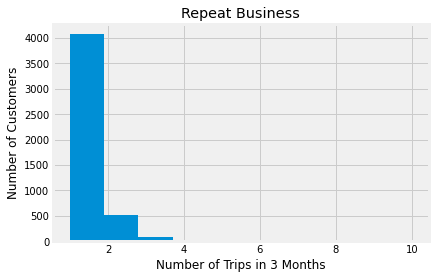

In [851]:
rpt_business = tafeng_full.groupby('customer_id')['transaction_time'].nunique()
rpt_business.hist(bins=rpt_business.max())

plt.xlabel('Number of Trips in 3 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')

A customer that is on the left side of the distribution shops only sporadically at TaFeng, and a customer on the right side of the distribution shops at TaFeng very frequently. The distribution is skewed right with nearly all the customers shopping fewer than 3 times in the three month period. Now it is hard to see the distribution for frequent customers (>=4 trips). Let's zoom in to better view the shape of the distribution of frequent customers.

(0.0, 20.0)

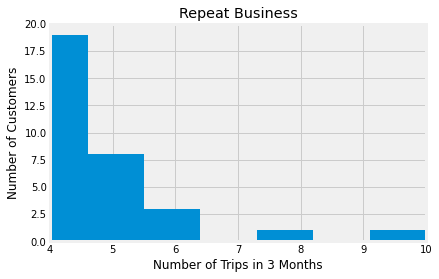

In [852]:
rpt_business.hist(bins=rpt_business.max())

plt.xlabel('Number of Trips in 3 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')

plt.xlim(4, 10)
plt.ylim(0, 20)

##### Example 2
In this example, we will investigate temporal trends in shopping behavior. We begin with the technical details of date-time data.

In [853]:
time_format = "%Y-%m-%d %H:%M:%S"
tafeng_full['transaction_time'] = pd.to_datetime(tafeng_full['transaction_time'], 
                                                format = time_format)
tafeng_full.head()

,entry_date,transaction_time,customer_id,age_code,residence_code,product_subclass,product_id,amount,asset,sales_price,age_range,age_min,age_max,age_center,residence_area
0,2016-12-26,2001-01-15,1786439,G,H,110109,4710043552065,1,144,190,50-54,50.0,54.0,52.0,unknown
1,2016-12-26,2001-01-15,98946,E,E,100312,4710543111014,1,32,38,40-44,40.0,44.0,42.0,115
2,2016-12-26,2001-01-15,905602,D,E,500206,4710114322115,1,64,79,35-39,35.0,39.0,37.0,115
3,2016-12-26,2001-01-15,1964295,E,E,530106,4713813010123,1,174,147,40-44,40.0,44.0,42.0,115
4,2016-12-26,2001-01-15,2146553,B,D,100217,8801019421013,1,47,52,25-29,25.0,29.0,27.0,114


Now we have the time data in a usable format, we can start looking into customer trends over time. Make a line plot of the number of unique customers per day against day. Note that we will change the granularity at which we are examining our data.

Text(0.5, 1.0, 'Unique Customers Per Day')

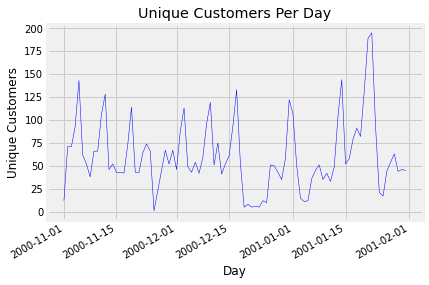

In [854]:
tafeng_full.groupby('transaction_time')['customer_id'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Day')
plt.ylabel('Unique Customers')
plt.title('Unique Customers Per Day')

What if we are interested in holidays?

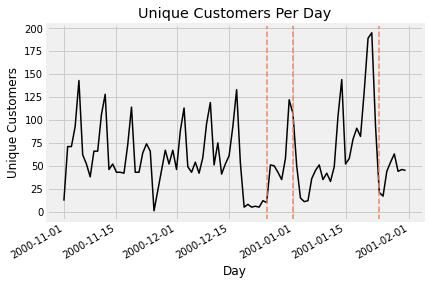

In [855]:
tafeng_full.groupby('transaction_time')['customer_id'].nunique().plot(color='black', lw=1.5)
plt.xlabel('Day')
plt.ylabel('Unique Customers')
plt.title('Unique Customers Per Day')

holidays = ['2000-12-25', '2001-01-01', '2001-01-24']
for holiday in holidays:
    plt.axvline(holiday, lw=1.5, color='#ef8a62', ls='dashed')

Now, let's play. We are going to investigate the TaFeng Transactions to another level.

We will investigate the shopping trips in greater detail. For example, we might be interested in the total number of items purchased, the total amount spent, and the number of unique products purchased on the trip. Since our data are at the level of items purchased, we need to aggregate our data to the shopping cart. Fortunately we have tools to do this; that is, we will change the granularity. For each shopping cart, we find:
1. "num_items" - the total number of items purchased;
1. "total_value" - the total value of the cart;
1. "num_unique" - the number of unique products purchased.

**NOTE**: as a data scientist, if not clear about one column, you should contact the person who knows the data well, here is Juhua

**Important Information**: 
1. `product_subclass`: category of a product
1. `product_id`: id used to identify a unique product
1. `amount`: total number of the corresponding product purchased in the transaction
1. `asset`: total number of inventory for the store
1. `sales_price`: total amount spent in the transaction (**NOT price per product**)





#### Question 2.2.d (8 points)
Create a data frame called `carts` that contains the three variables above, as well as "customer_id" and "transaction_time" (i.e., date). Make sure you use the names specified.

In [856]:
# type your code here
# num_items = tafeng_full.groupby(['customer_id', 'transaction_time'])['amount'].sum()
num_items_data = tafeng_full.groupby(['customer_id', 'transaction_time'])['amount'].agg('sum')
num_items = pd.DataFrame(data = {'num_items': num_items_data})
num_items

num_items
customer_id transaction_time           
0           2000-11-29                1
            2000-12-02                4
            2000-12-23                1
            2001-01-03                3
            2001-01-09                1
...                                 ...
2172941     2001-01-22                2
2173061     2001-01-22                1
2173436     2001-01-27                9
2173634     2001-01-28                1
20002000    2000-12-13                1

[5515 rows x 1 columns]

In [857]:
total_value_data = tafeng_full.groupby(['customer_id', 'transaction_time'])['sales_price'].agg('sum')
total_value = pd.DataFrame(data = {'total_value': total_value_data})
total_value

total_value
customer_id transaction_time             
0           2000-11-29                 85
            2000-12-02                396
            2000-12-23                 36
            2001-01-03                207
            2001-01-09                155
...                                   ...
2172941     2001-01-22                178
2173061     2001-01-22                207
2173436     2001-01-27                378
2173634     2001-01-28                 35
20002000    2000-12-13                100

[5515 rows x 1 columns]

In [858]:
num_unique_data = tafeng_full.groupby(['customer_id', 'transaction_time'])['product_id'].nunique()
num_unique = pd.DataFrame(data = {'num_unique': num_unique_data})
num_unique

num_unique
customer_id transaction_time            
0           2000-11-29                 1
            2000-12-02                 1
            2000-12-23                 1
            2001-01-03                 1
            2001-01-09                 1
...                                  ...
2172941     2001-01-22                 1
2173061     2001-01-22                 1
2173436     2001-01-27                 1
2173634     2001-01-28                 1
20002000    2000-12-13                 1

[5515 rows x 1 columns]

In [859]:
carts_2 = pd.merge(num_items, total_value, how='outer', on=['customer_id', 'transaction_time'])
carts = pd.merge(carts_2, num_unique, how='outer', on=['customer_id', 'transaction_time'])
carts

num_items  total_value  num_unique
customer_id transaction_time                                    
0           2000-11-29                1           85           1
            2000-12-02                4          396           1
            2000-12-23                1           36           1
            2001-01-03                3          207           1
            2001-01-09                1          155           1
...                                 ...          ...         ...
2172941     2001-01-22                2          178           1
2173061     2001-01-22                1          207           1
2173436     2001-01-27                9          378           1
2173634     2001-01-28                1           35           1
20002000    2000-12-13                1          100           1

[5515 rows x 3 columns]

#### Question 2.2.e (6 points)
Now let's take a look at the relationship between the number of items in a cart and the cart's total value. Intuitively the two should be positively correlated. Make a SCATTER plot that will help us inspect the relationship between these two variables.

**Note**: Please provide clear information of the plot (e.g., x-axis label, y-axis label, etc.) (-3, if not)

Text(0.5, 1.0, 'Relation Between num_items and total_value In the Cart')

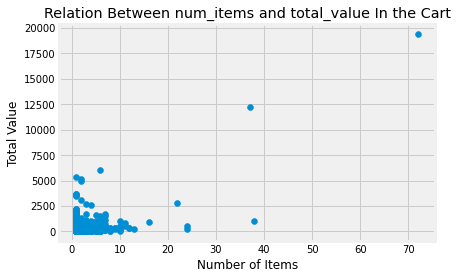

In [860]:
# type your code here
# carts.plot.scatter(x='num_items', y='total_value')
plt.scatter(carts['num_items'], carts['total_value'])
plt.xlabel('Number of Items')
plt.ylabel('Total Value')
plt.title('Relation Between num_items and total_value In the Cart')

#### Question 2.2.f (3 points)

We might expect from the distribution of the number of trips that there would be a few very large values for the number of items and the total amount spent. Indeed, a handful of observations make it difficult to see the shape of the bulk of the data. Take a log transformation of these two variables. Make another scatter plot, but this time, log-transform both the x and y axes. (2 points)

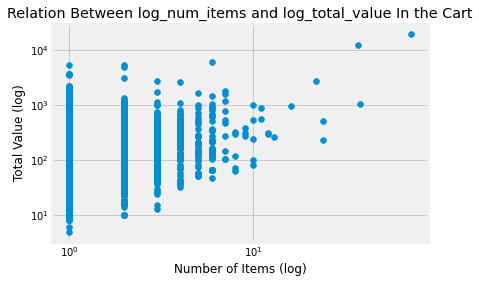

In [861]:
# type your code here
plt.scatter(carts['num_items'], carts['total_value'])
plt.xlabel('Number of Items (log)')
plt.ylabel('Total Value (log)')
plt.title('Relation Between log_num_items and log_total_value In the Cart')
plt.xscale("log")
plt.yscale("log")

#### Question 2.2.g (3 points)

Please study the functionality of seaborn's `lmplot` [method](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use it to simultaneously plot the points and the line-of-best-fit for the above log-log data.

In [862]:
# type your code here
carts['log_num_items'] = np.log(carts['num_items'])
carts['log_total_value'] = np.log(carts['total_value'])
carts.head()


num_items  ...  log_total_value
customer_id transaction_time             ...                 
0           2000-11-29                1  ...         4.442651
            2000-12-02                4  ...         5.981414
            2000-12-23                1  ...         3.583519
            2001-01-03                3  ...         5.332719
            2001-01-09                1  ...         5.043425

[5 rows x 5 columns]

Text(0.5, 1.0, 'Relation Between log_num_items and log_total_value In the Cart')

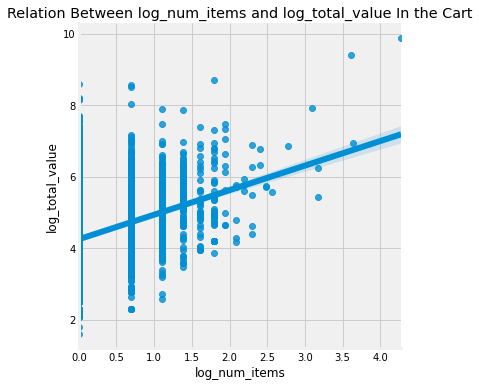

In [863]:
import seaborn as sns
g = sns.lmplot(x = 'log_num_items', y = 'log_total_value', data = carts)
ax = plt.gca()
ax.set_title("Relation Between log_num_items and log_total_value In the Cart")

#### Question 2.2.h (1 point)
What kind of relationship between "num_items" and "total_value" you can see from the seaborn's lmplot? 

**Your Answer**: They are positively correlated. 

#### Self-Directed EDA
This last question is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them. Be sure to make plots that are appropriate for the variable types. For completeness, be explicit about any assumptions you make in your analysis.

#### Question 2.2.i (10 points)
Make a visualization of and interpret the age distribution of the shoppers.

**Note**: It is important NOT to count one customer multiple times.

In [864]:
# type your code here
# this is the number of the total customers with unique id: 4708
customers_data = tafeng_full.customer_id.unique()
customers = pd.DataFrame(data={'customer_id': customers_data})
customers

,customer_id
0,1786439
1,98946
2,905602
3,1964295
4,2146553
...,...
4703,302579
4704,941457
4705,1984767
4706,1284423


In [865]:
# drop the duplicate customer_id: we also get 4708 data (same as the above result) 
age_ranges_data = tafeng_full.drop_duplicates(['customer_id'])['age_range']
age_min_data = tafeng_full.drop_duplicates(['customer_id'])['age_min']
age_max_data = tafeng_full.drop_duplicates(['customer_id'])['age_max']
age_center_data = tafeng_full.drop_duplicates(['customer_id'])['age_center']
age_code_data = tafeng_full.drop_duplicates(['customer_id'])['age_code']
age_ranges = pd.DataFrame(data={
    'customer_id': customers_data, 'age_range': age_ranges_data,
    'age_min': age_min_data, 'age_max': age_max_data,
    'age_center': age_center_data, 'age_code': age_code_data
    })
age_ranges

,customer_id,age_range,age_min,age_max,age_center,age_code
0,1786439,50-54,50.0,54.0,52.0,G
1,98946,40-44,40.0,44.0,42.0,E
2,905602,35-39,35.0,39.0,37.0,D
3,1964295,40-44,40.0,44.0,42.0,E
4,2146553,25-29,25.0,29.0,27.0,B
...,...,...,...,...,...,...
5824,302579,45-49,45.0,49.0,47.0,F
5825,941457,30-34,30.0,34.0,32.0,C
5829,1984767,30-34,30.0,34.0,32.0,C
5831,1284423,45-49,45.0,49.0,47.0,F


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc70d2a36d0>,
      dtype=object)

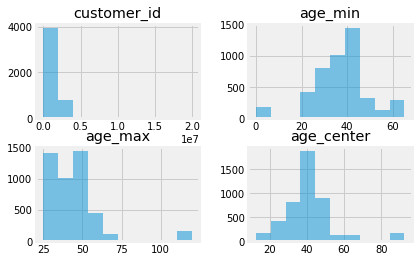

In [866]:
# see each histogram in the dataframe "age_ranges"
age_ranges.hist(alpha=0.5)

In [867]:
age_distri_data = age_ranges.groupby('age_range')['customer_id'].nunique()
age_distri_2 = pd.DataFrame(data={'age_number': age_distri_data})
# see what the distribution of the age_range looks like
age_distri = pd.merge(age_distri_2, age_classes_2, how='left', on='age_range')
age_distri


,age_range,age_number,age_code,age_min,age_max,age_center
0,0-25,181,A,0,25,12.5
1,25-29,415,B,25,29,27.0
2,30-34,812,C,30,34,32.0
3,35-39,1014,D,35,39,37.0
4,40-44,866,E,40,44,42.0
5,45-49,576,F,45,49,47.0
6,50-54,321,G,50,54,52.0
7,55-59,128,H,55,59,57.0
8,60-64,123,I,60,64,62.0
9,65-120,167,J,65,120,92.5


Text(0.5, 1.0, 'Age Distribution of the Shoppers')

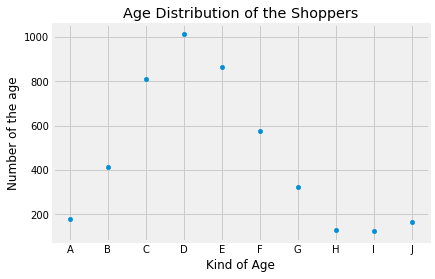

In [868]:
# plot the Age Distribution based on the age_code
age_distri.plot.scatter(x='age_code', y='age_number')
plt.xlabel('Kind of Age')
plt.ylabel('Number of the age')
plt.title('Age Distribution of the Shoppers')

Text(0.5, 1.0, 'Age Distribution of the Shoppers')

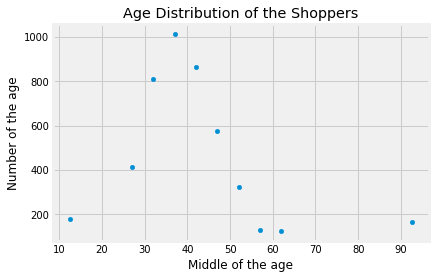

In [869]:
# plot the Age Distribution based on the age_center
age_distri.plot.scatter(x='age_center', y='age_number')
plt.xlabel('Middle of the age')
plt.ylabel('Number of the age')
plt.title('Age Distribution of the Shoppers')

#### Question 2.2.j (2 points)

YOUR OBSERVATIONS from 2.2.i?

As for the age distribution of the shoppers, the proportion of people aged 35-39 is the most, and the proportion of people younger than 25 or older than 55 is the least.

**Before you submit, please restart and run all to have a good submission.**